For first tutorial. Here are the basic activities to do with Julia:
 
1. Create a script that approximates the series $\sum_{k=1}^\infty 1/k^2$.  It needs to be close to $\pi^2/6$
1. Create scripts that plot the distributions, using histogram of random quantities generated from random matrices:
     * The random matrices are always of the form 2rand(m,n) .- 1 (these are always entries between [-1 and +1]
     * Use N = $10^4$ or N = $10^5$ or N = $10^6$ for the number of matrices
     * Compute:
        1. Determinant of m=2,n=2, m=3,n=3.
        1. sum(inv(A)*A-I) for n = 50, m = 50
        1. $||u||~||v|| - |u^Tv|$ when u and v are the first two cols of a matrix with m = 4 n =2

1. Run: https://github.com/h-Klok/StatsWithJuliaBook/blob/master/1_chapter/polyRoots.jl and test it for different polynomials.
1. Run: https://github.com/h-Klok/StatsWithJuliaBook/blob/master/1_chapter/plotSimple.jl and change the functions plotted
 
 

In [1]:
#1 
N = 10000
sum([1/k^2 for k in 1:N]) - π^2/6  #\pi + [TAB] creates π

-9.99950001654426e-5

In [2]:
using Plots  #for this to work need (first time) using Pkg; Pkg.add("Plots")

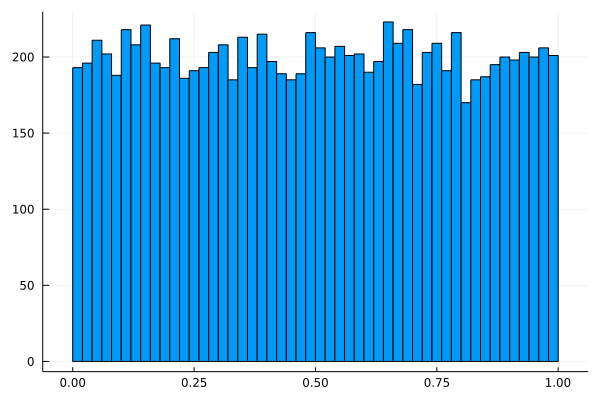

In [3]:
histogram(rand(10000),label = false,nbins = 50)

In [4]:
m = 2
n = 2
2rand(m,n) .- 1   # .- subtracts the scalar from the matrix

2×2 Matrix{Float64}:
  0.789259  -0.900639
 -0.586856  -0.26374

In [5]:
myRandMat() = 2rand(m,n) .- 1

myRandMat (generic function with 1 method)

In [6]:
myRandMat()

2×2 Matrix{Float64}:
 -0.843362   0.662654
  0.308657  -0.475193

In [7]:
using LinearAlgebra #needed for norm(), det() etc...
det(myRandMat())

-0.4204735098163402

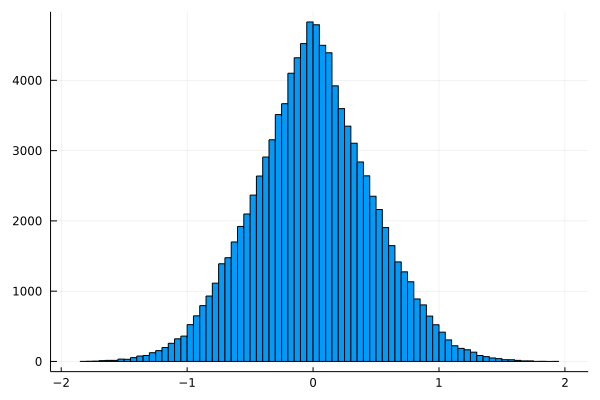

In [8]:
N = 10^5
data = [det(myRandMat()) for _ in 1:N]
histogram(data,label=false,bins = 100)

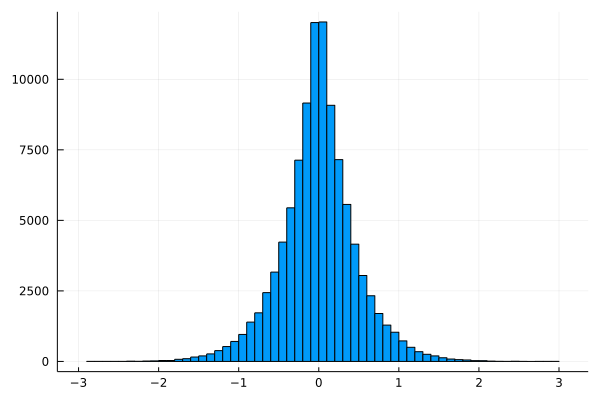

In [9]:
N = 10^5
m,n = 3,3
data = [det(myRandMat()) for _ in 1:N]
histogram(data,label=false,bins = 100)

In [10]:
m,n = 50, 50
N = 10^4

data = []

for _ in 1:N
    A = myRandMat()
    Ai = inv(A)
    err = sum(A*Ai - I) #Frobenious norm is sum of elements of matrix
    push!(data,err)
end

In [11]:
histogram(data)

In [12]:
sort(data)

10000-element Vector{Any}:
 -5.7199909199656073e-11
 -5.6577384617531404e-11
 -3.788538544960999e-11
 -1.8692982900238097e-11
 -1.7992296274365335e-11
 -1.4067131971674656e-11
 -1.3775319609359679e-11
 -1.0194277264622974e-11
 -8.242955073178294e-12
 -7.833675729523184e-12
 -7.52981330793225e-12
 -6.718665593213633e-12
 -6.4477253465712715e-12
  ⋮
  2.2131895509992527e-11
  2.4281755164870148e-11
  2.5373871026391702e-11
  3.838515665792016e-11
  4.037061235109635e-11
  5.814344910432995e-11
  6.421475865417771e-11
  9.545705530386504e-11
  1.07987140119917e-10
  1.3119108737110913e-10
  1.513968931678138e-10
  1.7587201237053846e-10

In [13]:
maximum(data)

1.7587201237053846e-10

In [14]:
#try to use filter() for filtering out the outliers....

## Now we are doing 2c

In [15]:
m,n = 4, 2
N = 10^4

data = []

for _ in 1:N
    A = myRandMat()
    u = A[:,1]
    v = A[:,2]
    err = norm(u)*norm(v)-abs(u'*v) #Cauchy Schwartz says this is positive
    push!(data,err)
end

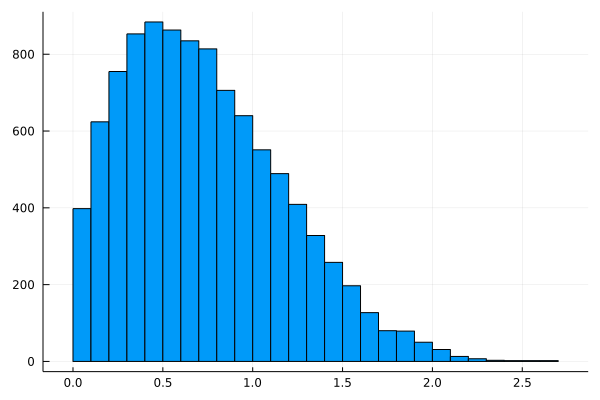

In [16]:
histogram(data,legend=false)

#maybe need using Pkg; Pkg.add("Roots")

In [17]:
using Pkg
Pkg.add("Roots")
Pkg.add("LaTeXStrings")
Pkg.add("Measures")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [18]:
using Roots #around page 20 here: https://statisticswithjulia.org/StatisticsWithJuliaDRAFT.pdf

function polynomialGenerator(a...)
    n = length(a)-1
    poly =  function(x)
                return sum([a[i+1]*x^i for i in 0:n])
            end
    return poly
end

polynomial = polynomialGenerator(1,3,-10)
zeroVals = find_zeros(polynomial,-10,10)
println("Zeros of the function f(x): ", zeroVals)

Zeros of the function f(x): [-0.19999999999999998, 0.5]


In [19]:
using Pkg
Pkg.add("PyPlot")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [20]:
using PyPlot

In [21]:
using Plots, LaTeXStrings, Measures; pyplot() #around page 26 here: https://statisticswithjulia.org/StatisticsWithJuliaDRAFT.pdf

f(x,y) = 3x^2 + y^2
f0(x) = f(x,0)
f2(x) = f(x,2)

xVals, yVals = -5:0.1:5 , -5:0.1:5
plot(xVals, [f0.(xVals), f2.(xVals)], 
    c=[:blue :red], xlims=(-5,5), legend=:top,
    ylims=(-5,25), ylabel=L"f(x,\cdot)", label=[L"f(x,0)" L"f(x,2)"])
p1 = annotate!(0, -0.2, text("(0,0) The minimum\n of f(x,0)", :left, :top, 10))

z = [ f(x,y) for y in yVals, x in xVals ]
p2 = surface(xVals, yVals, z, c=cgrad([:blue, :red]),legend=:none, 
    ylabel="y", zlabel=L"f(x,y)")

M = z[1:10,1:10]
p3 = heatmap(M, c=cgrad([:blue, :red]), yflip=true, ylabel="y",  
    xticks=([1:10;], xVals), yticks=([1:10;], yVals))

plot(p1, p2, p3, layout=(1,3), size=(1200,400), xlabel="x", margin=5mm)

LoadError: UndefVarError: plot not defined